## Import Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt  

In [3]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/user_data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/user_data/test.csv')

In [4]:
train

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000
1,1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2012,9915000
3,3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Gray,2007,3815000
4,4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2010,7385000
...,...,...,...,...,...,...,...,...,...,...,...
1010,1010,Toyota Corolla,46768,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Black,2014,5415000
1011,1011,Toyota Camry,31600,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,Silver,2011,3615000
1012,1012,Toyota Camry,96802,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,Black,2011,3415000
1013,1013,Lexus GX 460,146275,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Gold,2013,14315000


In [5]:
print("--------------- train ---------------")
train.info()
print("\n\n--------------- test ---------------")
test.info()

--------------- train ---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1015 non-null   int64 
 1   title         1015 non-null   object
 2   odometer      1015 non-null   int64 
 3   location      1015 non-null   object
 4   isimported    1015 non-null   object
 5   engine        1015 non-null   object
 6   transmission  1015 non-null   object
 7   fuel          1015 non-null   object
 8   paint         1015 non-null   object
 9   year          1015 non-null   int64 
 10  target        1015 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 87.4+ KB


--------------- test ---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            436 non-nul

## 'Title' Column

In [6]:
sorted(train['title'].unique())

['ALPINA B3',
 'Acura MDX',
 'Acura RDX',
 'Acura TL',
 'Acura ZDX',
 'Audi S6',
 'BMW 325',
 'BMW 335',
 'BMW 528',
 'BMW 730',
 'BMW 740',
 'BMW 745',
 'BMW 750',
 'BMW X6',
 'Bentley Arnage',
 'Chevrolet Camaro',
 'Chevrolet Evanda',
 'Chevrolet Traverse',
 'DAF 45',
 'DAF 95XF TRACTOR HEAD',
 'DAF CF',
 'DAF FA 55. 180',
 'Dodge Charger',
 'Ford Edge',
 'Ford Escape',
 'Ford Expedition',
 'Ford Explorer',
 'Ford F 150',
 'Ford Focus',
 'Ford Fusion',
 'Ford Transit',
 'GAC Gonow Other',
 'GMC Terrain',
 'Honda Accord',
 'Honda CR-V',
 'Honda Civic',
 'Honda Crosstour',
 'Honda Element',
 'Honda Fit',
 'Honda Insight',
 'Honda Odyssey',
 'Honda Pilot',
 'Honda Ridgeline',
 'Hyundai Azera',
 'Hyundai Elantra',
 'Hyundai Santa Fe',
 'Hyundai Sonata',
 'Hyundai Tucson',
 'Hyundai ix35',
 'IVECO EUROTECH 7.50E-16',
 'IVM LT35',
 'Infiniti FX',
 'Infiniti JX',
 'Infiniti M35',
 'Infiniti QX80',
 'Isuzu CABSTER',
 'Isuzu NQR',
 'Iveco TRUCK',
 'JMC Vigus',
 'Jaguar X-Type',
 'Jaguar XJ8',

In [7]:
sorted(test['title'].unique())

['Acura MDX',
 'Acura RDX',
 'Acura TL',
 'Acura TSX',
 'BMW 525',
 'BMW 535',
 'BMW X3',
 'Chevrolet Camaro',
 'DAF XF TRACTOR HEAD',
 'Fiat Ducato',
 'Ford Edge',
 'Ford Explorer',
 'Ford F 150',
 'Ford Fusion',
 'Ford Mondeo',
 'Ford Mustang',
 'Ford TRANSIT PICKUP',
 'Ford Transit',
 'Honda Accord',
 'Honda CR-V',
 'Honda Civic',
 'Honda Crosstour',
 'Honda Element',
 'Honda Fit',
 'Honda Odyssey',
 'Honda Pilot',
 'Honda Ridgeline',
 'Hyundai Azera',
 'Hyundai Elantra',
 'Hyundai Santa Fe',
 'Hyundai Sonata',
 'Infiniti FX',
 'Iveco EUROCARGO 120e18',
 'Iveco TRUCK',
 'Jeep Wrangler',
 'Kia Optima',
 'Kia Rio',
 'Land Rover Discovery',
 'Land Rover Range Rover',
 'Land Rover Range Rover Sport',
 'Lexus ES 300',
 'Lexus ES 350',
 'Lexus GS 300',
 'Lexus GS 350',
 'Lexus GX 460',
 'Lexus GX 470',
 'Lexus IS 250',
 'Lexus LX 570',
 'Lexus RX 300',
 'Lexus RX 330',
 'Lexus RX 350',
 'Lexus RX 400',
 'MINI Cooper',
 'MINI Cooper Coupé',
 'Mack CXN613 CAB BEHIND ENGINE',
 'Mack R-686ST'

In [8]:
train['brand'] = train['title'].apply(lambda x:x.split()[0])
test['brand'] = test['title'].apply(lambda x:x.split()[0])

In [9]:
train.brand.value_counts()

Toyota              474
Lexus               122
Mercedes-Benz       105
Honda                81
Ford                 36
Nissan               24
Hyundai              24
Land                 19
Kia                  15
Volkswagen           13
BMW                  10
Acura                 9
Mack                  8
Mazda                 8
Volvo                 7
Infiniti              5
Chevrolet             5
Porsche               4
Man                   4
GAC                   4
DAF                   4
Mitsubishi            4
Pontiac               3
Jaguar                3
Scania                3
Peugeot               3
Isuzu                 2
MINI                  2
MAN-VOLKSWAGEN        1
Mercedes-Benz/52      1
JMC                   1
Bentley               1
ALPINA                1
Jeep                  1
Lincoln               1
Rolls-Royce           1
IVECO                 1
Iveco                 1
GMC                   1
Dodge                 1
IVM                   1
Audi            

In [10]:
train = train.replace({'Mercedes-Benz/52' : 'Mercedes-Benz'})

In [11]:
train.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000,Toyota
1,1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000,Toyota
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2012,9915000,Land
3,3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Gray,2007,3815000,Lexus
4,4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2010,7385000,Toyota


In [12]:
brand_list = train[['brand', 'target']].groupby(['brand'], as_index=False).mean().sort_values(by='target', ascending=True,ignore_index=True)
brand_list

,brand,target
0,Audi,1.215000e+06
1,GAC,1.490000e+06
2,Nissan,1.926125e+06
3,Mazda,2.078750e+06
4,Peugeot,2.125000e+06
5,Volkswagen,2.266538e+06
6,Jeep,2.515000e+06
7,Jaguar,2.665000e+06
8,Kia,2.697667e+06
9,Pontiac,2.715000e+06


In [13]:
for i,br in enumerate(brand_list.brand):
    train['brand'] = train['brand'].replace({br : int(brand_list.target[i] / 10 ** 5)})   
    test['brand'] = test['brand'].replace({br : int(brand_list.target[i] / 10 ** 5)})

In [14]:
train.brand.unique()

array([  62,  293,  139,   27,   60,   43,   41,  152,  161,  136,   38,
         26,   34,   19,   89,   72,   20,   44,   22,   40,  146,   28,
        142,   55,  100,   79,   14,   21, 1500,   63,   25,   90,  280,
         93,   12])

In [15]:
test.brand.unique()

array([136, 43, 62, 100, 139, 19, 22, 25, 60, 152, 89, 293, 38, 21, 41,
       161, 40, 146, 'Fiat', 55, 20, 142, 34, 72, 26, 27, 1500],
      dtype=object)

In [16]:
test = test.replace({'Fiat' : 55} ) # train['brand']의 중간값으로 설정했습니다.

In [17]:
train[['brand', 'target']].groupby(['brand'], as_index=False).mean().sort_values(by='target', ascending=True,ignore_index=True)

,brand,target
0,12,1.215000e+06
1,14,1.490000e+06
2,19,1.926125e+06
3,20,2.078750e+06
4,21,2.125000e+06
5,22,2.266538e+06
6,25,2.515000e+06
7,26,2.692222e+06
8,27,2.715000e+06
9,28,2.890000e+06


## 'location' Column

In [18]:
print(sorted(train.location.unique()))
print(sorted(test.location.unique()))

['Abia', 'Abia State', 'Abuja', 'Abuja ', 'Accra', 'Adamawa ', 'FCT', 'Lagos', 'Lagos ', 'Lagos State', 'Ogun', 'Ogun State', 'other']
['Abia', 'Abuja', 'Abuja ', 'Arepo ogun state ', 'Lagos', 'Lagos ', 'Lagos State', 'Mushin', 'Ogun', 'Ogun State', 'other']


In [19]:
train = train.replace({
    'Abia State' : 'Abia',
    'Abuja ' : 'Abuja',
    'Lagos ' : 'Lagos',
    'Lagos State' : 'Lagos',
    'Ogun State' : 'Ogun'
    })

In [20]:
test = test.replace({
    'Abuja ' : 'Abuja',
    'Lagos ' : 'Lagos',
    'Lagos State' : 'Lagos',
    'Ogun State' : 'Ogun',
    'Arepo ogun state ' : 'Ogun',
    'Mushin' : 'Lagos',   # Mushin 검색 시 Lagos에 속한 도시라고 합니다(구글 검색)
})

In [21]:
print(train.location.value_counts())
print(test.location.value_counts())

Lagos       831
Abuja       147
Ogun         27
other         4
FCT           2
Abia          2
Accra         1
Adamawa       1
Name: location, dtype: int64
Lagos    355
Abuja     69
Ogun      10
other      1
Abia       1
Name: location, dtype: int64


In [22]:
train = train.replace({
    'FCT' : 'other',
    'Abia ' : 'other',
    'Accra ' : 'other',
    'Adamawa' : 'other'
    })

test = test.replace({
    'Abia' : 'other'
    })

## 'engine' Column

In [23]:
train.engine.value_counts()

4-cylinder(I4)    618
6-cylinder(V6)    222
6-cylinder(I6)    118
8-cylinder(V8)     49
3-cylinder(I3)      3
4-cylinder(H4)      2
5-cylinder(I5)      2
2-cylinder(I2)      1
Name: engine, dtype: int64

In [24]:
train.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000,62
1,1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000,62
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2012,9915000,293
3,3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Gray,2007,3815000,139
4,4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2010,7385000,62


In [25]:
engine_list = train[['engine', 'target']].groupby(['engine'], as_index=False).mean().sort_values(by='target', ascending=False,ignore_index=True)
engine_list

,engine,target
0,8-cylinder(V8),2.280010e+07
1,4-cylinder(H4),1.139000e+07
2,6-cylinder(V6),7.989856e+06
3,6-cylinder(I6),7.841907e+06
4,4-cylinder(I4),7.294036e+06
5,5-cylinder(I5),3.815000e+06
6,3-cylinder(I3),3.138333e+06
7,2-cylinder(I2),3.015000e+06


In [26]:
for i,eg in enumerate(engine_list.engine):
    train['engine'] = train['engine'].replace({eg : int(engine_list.target[i] / 10 ** 6)})   
    test['engine'] = test['engine'].replace({eg : int(engine_list.target[i] / 10 ** 6)})

In [27]:
test.engine.unique()

array([7, 22, 3, '12-cylinder(V12)'], dtype=object)

In [28]:
test = test.replace({'12-cylinder(V12)' : 7}) # 중간 값으로 설정

## 'paint' Column

In [29]:
sorted(train.paint.unique())

[' Black',
 ' Black/Red',
 'Ash',
 'Ash and black',
 'BLACK',
 'Beige',
 'Black',
 'Black ',
 'Black and silver',
 'Black sand pearl',
 'Black.',
 'Blue',
 'Blue ',
 'Brown',
 'Cream',
 'Cream ',
 'DARK GREY',
 'Dark Ash',
 'Dark Blue',
 'Dark Green',
 'Dark Grey',
 'Dark ash',
 'Dark blue ',
 'Dark gray',
 'Dark silver ',
 'Deep Blue',
 'Deep blue',
 'GOLD',
 'Gery',
 'Gold',
 'Gold ',
 'Gray',
 'Gray ',
 'Green',
 'Green ',
 'Grey',
 'Grey ',
 'Ink blue',
 'Light Gold',
 'Light blue',
 'Light silver ',
 'Magnetic Gray',
 'Magnetic Gray Metallic',
 'Maroon',
 'Midnight Black Metal',
 'Milk',
 'Navy blue',
 'Off white',
 'Off white l',
 'Pale brown',
 'Purple',
 'Red',
 'Redl',
 'SILVER',
 'Silver',
 'Silver ',
 'Silver/grey',
 'Sky blue',
 'Skye blue',
 'Sliver',
 'Super White',
 'WHITE',
 'WINE',
 'Whine ',
 'White',
 'White ',
 'White orchild pearl',
 'Wine',
 'Yellow',
 'blue',
 'green',
 'orange',
 'red',
 'white',
 'white-blue',
 'yellow']

In [30]:
sorted(test.paint.unique())

['  Brown',
 'Ash',
 'BLACK',
 'Beige',
 'Blac',
 'Black',
 'Black ',
 'Blue',
 'Blue ',
 'Brown',
 'Classic Silver Met(1F7)',
 'Cream',
 'Cream ',
 'Dark Ash',
 'Dark Blue',
 'Dark Green',
 'Dark Grey',
 'Dark blue ',
 'GOLD',
 'Gold',
 'Gold ',
 'Golf',
 'Gray',
 'Green',
 'Green ',
 'Grey',
 'Grey ',
 'Grey and black',
 'Indigo ink pearl',
 'Light Grey',
 'Maroon',
 'Mint green',
 'Navy blue',
 'Red',
 'Silver',
 'Silver ',
 'Sliver',
 'Sliver ',
 'White',
 'White and green',
 'Wine',
 'Yellow',
 'black',
 'blue',
 'green',
 'white']

In [31]:
import re 

def clean_text(texts): 
    corpus = [] 
    for i in range(0, len(texts)): 
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"\n\]\[\>\<]', '',texts[i]) #@%*=()/+ 와 같은 문장부호 제거
        review = re.sub(r'\d+','',review)#숫자 제거
        review = review.lower() #소문자 변환
        review = re.sub(r'\s+', ' ', review) #extra space 제거
        review = re.sub(r'<[^>]+>','',review) #Html tags 제거
        review = re.sub(r'\s+', ' ', review) #spaces 제거
        review = re.sub(r"^\s+", '', review) #space from start 제거
        review = re.sub(r'\s+$', '', review) #space from the end 제거
        review = re.sub(r'_', ' ', review) #space from the end 제거
        #review = re.sub(r'l', '', review)
        corpus.append(review) 
        
    return corpus

temp = clean_text(train['paint']) #메소드 적용
train['paint'] = temp
print('train data에서 paint의 unique 카테고리 개수 : ', len(train['paint'].unique()))

train data에서 paint의 unique 카테고리 개수 :  51


In [32]:
temp2 = clean_text(test['paint'])
test['paint'] = temp2
print('test data에서 paint의 unique 카테고리 개수 : ', len(test['paint'].unique()))

test data에서 paint의 unique 카테고리 개수 :  30


In [33]:
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'blue' if x.find('blue') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'red' if x.find('red') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'green' if x.find('green') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'grey' if x.find('grey') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'grey' if x.find('gery') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'grey' if x.find('gray') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'ash' if x.find('ash') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'brown' if x.find('brown') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'silver' if x.find('silver') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'silver' if x.find('sliver') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'black' if x.find('black') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'gold' if x.find('gold') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'wine' if x.find('whine') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'white' if x.find('white') >= 0 else x)


test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'blue' if x.find('blue') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'red' if x.find('red') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'green' if x.find('green') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'grey' if x.find('grey') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'grey' if x.find('gery') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'grey' if x.find('gray') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'ash' if x.find('ash') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'brown' if x.find('brown') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'silver' if x.find('silver') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'silver' if x.find('sliver') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'black' if x.find('black') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'black' if x.find('blac') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'gold' if x.find('gold') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'wine' if x.find('whine') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'white' if x.find('white') >= 0 else x)


In [34]:
print('train data에서 paint의 unique 카테고리 개수 : ', len(train['paint'].value_counts()))

train data에서 paint의 unique 카테고리 개수 :  18


In [35]:
print('test data에서 paint의 unique 카테고리 개수 : ', len(test['paint'].value_counts()))

test data에서 paint의 unique 카테고리 개수 :  17


In [36]:
sorted(train.paint.unique())

['ash',
 'beige',
 'black',
 'blue',
 'brown',
 'cream',
 'gold',
 'green',
 'grey',
 'maroon',
 'milk',
 'orange',
 'purple',
 'red',
 'silver',
 'white',
 'wine',
 'yellow']

In [37]:
sorted(test.paint.unique())

['ash',
 'beige',
 'black',
 'blue',
 'brown',
 'cream',
 'gold',
 'golf',
 'green',
 'grey',
 'indigo ink pearl',
 'maroon',
 'red',
 'silver',
 'white',
 'wine',
 'yellow']

## 'year' Column

In [38]:
print(sorted(train.year.unique()))
print(sorted(test.year.unique()))

[1217, 1218, 1980, 1982, 1985, 1991, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
[1324, 1726, 1987, 1993, 1994, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2626]


In [39]:
train[(train.year == 1217) | (train.year == 1218)]

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
415,415,Mercedes-Benz ATEGO,403461,Lagos,Locally used,7,manual,diesel,white,1218,6015000,136
827,827,Mercedes-Benz,510053,Lagos,Locally used,7,manual,diesel,white,1217,75015000,136


In [40]:
data_description = train.describe().iloc[:,3:4]
data_description

,year
count,1015.000000
mean,2008.385222
std,35.592123
min,1217.000000
25%,2006.000000
50%,2010.000000
75%,2014.000000
max,2020.000000


In [41]:
train['year'] = train['year'].replace([1218, 1217], [2010, 2010])

In [42]:
test[(test.year == 1324) | (test.year == 1726)| (test.year == 2626)]

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand
304,304,Mercedes-Benz CABIN PLUS CHASSIS ONLY,650923,Lagos,Locally used,7,manual,diesel,blue,1324,136
406,406,Mercedes-Benz DUMP TRUCK,0,Lagos,Locally used,22,manual,diesel,white,2626,136
411,411,Mercedes-Benz WATER TANKER,701934,Lagos,Locally used,22,manual,diesel,white,1726,136


In [43]:
test['year'] = test['year'].replace([1324, 1726, 2626], [2010, 2010, 2020])

In [44]:
# 연식으로 대체
train['year'] = 2020 - train['year']
test['year'] = 2020 - test['year']

## 가격 이상치

In [45]:
train[(train.target > 100000000)]

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
341,341,Land Rover Range Rover Sport,18720,Lagos,Foreign Used,22,automatic,petrol,grey,1,117015000,293
569,569,Lexus LX 570,55530,Abuja,Foreign Used,22,automatic,petrol,black,6,110015000,139
597,597,Rolls-Royce Ghost,16069,Lagos,Locally used,7,automatic,petrol,black,9,150015008,1500
736,736,Mercedes-Benz G 63 AMG,20,Lagos,New,22,automatic,petrol,black,1,108690000,136



레인지로버 스포츠는 117015000 나이라(나이지리아 돈) 은 한국돈으로 3억정도인데
실제 중고가가 1억정도니까 33015000로 바꾸었습니다.

본 내용 코드공유에서 참고했으며 유의미하다고 판단했습니다.

In [46]:
train.loc[341,'target'] = 33015000
train.loc[569,'target'] = 29015000
train.loc[736,'target'] = 60015000

## 정리(주어진 라벨링 함수로 나머지 칼럼 적용)

In [47]:
train

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,7,automatic,petrol,red,4,13665000,62
1,1,Toyota Land Cruiser,10,Lagos,New,7,automatic,petrol,black,1,33015000,62
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,7,automatic,petrol,red,8,9915000,293
3,3,Lexus ES 350,91524,Lagos,Foreign Used,7,automatic,petrol,grey,13,3815000,139
4,4,Toyota Venza,94177,Lagos,Foreign Used,7,automatic,petrol,red,10,7385000,62
...,...,...,...,...,...,...,...,...,...,...,...,...
1010,1010,Toyota Corolla,46768,Lagos,Foreign Used,7,automatic,petrol,black,6,5415000,62
1011,1011,Toyota Camry,31600,Abuja,Foreign Used,7,automatic,petrol,silver,9,3615000,62
1012,1012,Toyota Camry,96802,Abuja,Foreign Used,7,automatic,petrol,black,9,3415000,62
1013,1013,Lexus GX 460,146275,Lagos,Foreign Used,7,automatic,petrol,gold,7,14315000,139


In [48]:
test

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand
0,0,Mercedes-Benz C 300,1234,Abuja,New,7,automatic,petrol,white,3,136
1,1,Honda Accord,29938,Abuja,Foreign Used,7,automatic,petrol,white,7,43
2,2,Mercedes-Benz S 550,87501,Lagos,Foreign Used,7,automatic,petrol,black,8,136
3,3,Toyota Sienna,180894,Lagos,Locally used,7,automatic,petrol,grey,19,62
4,4,Toyota Hiace,104814,Lagos,Foreign Used,7,automatic,petrol,white,20,62
...,...,...,...,...,...,...,...,...,...,...,...
431,431,Mercedes-Benz GLK 350,78175,Lagos,Foreign Used,7,automatic,petrol,blue,6,136
432,432,Honda Crosstour,129223,Lagos,Foreign Used,7,automatic,petrol,red,9,43
433,433,Mercedes-Benz ML 350,100943,Lagos,Foreign Used,7,automatic,petrol,black,7,136
434,434,Lexus GX 470,81463,Lagos,Foreign Used,7,automatic,petrol,green,17,139


In [49]:
#라벨인코딩을 하기 위함 dictionary map 생성 함수
def make_label_map(dataframe):
    label_maps = {}
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            label_map = {'unknown':0}
            for i, key in enumerate(dataframe[col].unique()):
                label_map[key] = i+1  #새로 등장하는 유니크 값들에 대해 1부터 1씩 증가시켜 키값을 부여해줍니다.
            label_maps[col] = label_map
    print(label_maps)
    return label_maps

# 각 범주형 변수에 인코딩 값을 부여하는 함수
def label_encoder(dataframe, label_map):
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            dataframe[col] = dataframe[col].map(label_map[col])
            dataframe[col] = dataframe[col].fillna(label_map[col]['unknown']) #혹시 모를 결측값은 unknown의 값(0)으로 채워줍니다.
    return dataframe

le = make_label_map(train)
train = label_encoder(train, le)
test = label_encoder(test, le)

{'title': {'unknown': 0, 'Toyota RAV 4': 1, 'Toyota Land Cruiser': 2, 'Land Rover Range Rover Evoque': 3, 'Lexus ES 350': 4, 'Toyota Venza': 5, 'Toyota Corolla': 6, 'Land Rover Range Rover Sport': 7, 'Pontiac Vibe': 8, 'Toyota Tacoma': 9, 'Lexus RX 350': 10, 'Ford Escape': 11, 'Honda Civic': 12, 'Volvo XC90': 13, 'BMW 750': 14, 'Infiniti JX': 15, 'Honda Accord': 16, 'Mercedes-Benz ML 350': 17, 'Toyota Camry': 18, 'Hyundai Azera': 19, 'Lexus GX 460': 20, 'BMW 325': 21, 'Toyota Sienna': 22, 'Honda Fit': 23, 'Honda CR-V': 24, 'Hyundai Tucson': 25, 'Ford Transit': 26, 'Jaguar XJ8': 27, 'BMW X6': 28, 'Mercedes-Benz C 300': 29, 'Mitsubishi Galant': 30, 'Mercedes-Benz GL 450': 31, 'Lexus RX 300': 32, 'Toyota Highlander': 33, 'Mitsubishi CANTER PICK UP': 34, 'Nissan Titan': 35, 'Lexus IS 250': 36, 'Mercedes-Benz 200': 37, 'Toyota Sequoia': 38, 'Ford Explorer': 39, 'Hyundai ix35': 40, 'Mack CH613 CONVENTIONAL CAB': 41, 'Lexus CT 200h': 42, 'Lexus LX 570': 43, 'Toyota Avensis': 44, 'Toyota 4-Run

In [50]:
train

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
0,0,1,18277,1,1,7,1,1,1,4,13665000,62
1,1,2,10,1,2,7,1,1,2,1,33015000,62
2,2,3,83091,1,1,7,1,1,1,8,9915000,293
3,3,4,91524,1,1,7,1,1,3,13,3815000,139
4,4,5,94177,1,1,7,1,1,1,10,7385000,62
...,...,...,...,...,...,...,...,...,...,...,...,...
1010,1010,6,46768,1,1,7,1,1,2,6,5415000,62
1011,1011,18,31600,2,1,7,1,1,6,9,3615000,62
1012,1012,18,96802,2,1,7,1,1,2,9,3415000,62
1013,1013,20,146275,1,1,7,1,1,10,7,14315000,139


## 모델링 및 테스트

In [51]:
X = train.drop(['id', 'target'], axis = 1) #training 데이터에서 피쳐 추출
y = train.target #training 데이터에서 중고차 가격 추출

In [67]:
from sklearn.model_selection import train_test_split

data = train.drop('id', axis = 1).copy() #필요없는 id열 삭제
train_data, val_data = train_test_split(data, test_size=0.25) #30프로로 설정
train_data.reset_index(inplace=True) #전처리 과정에서 데이터가 뒤섞이지 않도록 인덱스를 초기화
val_data.reset_index(inplace=True)

print('학습시킬 train 셋 : ', train_data.shape)
print('검증할 val 셋 : ', val_data.shape)

학습시킬 train 셋 :  (761, 12)
검증할 val 셋 :  (254, 12)


In [68]:
train_data_X = train_data.drop(['target', 'index'], axis = 1) #training 데이터에서 피쳐 추출
train_data_y = train_data.target #training 데이터에서 target 추출

val_data_X = val_data.drop(['target', 'index'], axis = 1) #training 데이터에서 피쳐 추출
val_data_y = val_data.target #validation 데이터에서 target 추출

In [54]:
# 그리드서치를 통한 각 모델에 대한 최적화 과정
# 본 실행시에는 이 cell을 제외할 것
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# ExtraTreesRegressor
"""
et = ExtraTreesRegressor(random_state=42)
param_grid = {'n_estimators': [100, 200, 300, 400], 
              'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 5, 10],
              'max_depth': [30, 50, 100]}
gs = GridSearchCV(estimator=et,param_grid=param_grid, cv= 5, scoring='neg_mean_absolute_error')
gs.fit(train_data_X, train_data_y)
print('베스트 {0}'.format(gs.best_params_))
print('정확도 {0:.2f}'.format(gs.best_score_))
model = gs.best_estimator_
"""
# RandomForestRegressor
"""
rf = RandomForestRegressor(random_state=42)
param_grid = {'n_estimators': [100, 200, 300, 400], 
              'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 3, 4],
              'max_depth': [25, 30, 35]}
gs = GridSearchCV(estimator=rf,param_grid=param_grid, cv= 5, scoring='neg_mean_absolute_error')
gs.fit(train_data_X, train_data_y)
print('베스트 {0}'.format(gs.best_params_))
print('정확도 {0:.2f}'.format(gs.best_score_))
model = gs.best_estimator_
"""
# GradientBoostingRegressor
"""
gb = GradientBoostingRegressor(random_state=42)
param_grid = {'n_estimators' : [100, 200, 300], 
              'max_features' : [2, 4, 6, 8],
              'max_depth': [5, 10, 15],
              'learning_rate' : [0.1, 0.15, 0.2, 0.25]}
gs = GridSearchCV(estimator=gb,param_grid=param_grid, cv= 5, scoring='neg_mean_absolute_error')
gs.fit(train_data_X, train_data_y)
print('베스트 {0}'.format(gs.best_params_))
print('정확도 {0:.2f}'.format(gs.best_score_))
model = gs.best_estimator_
"""

"\ngb = GradientBoostingRegressor(random_state=42)\nparam_grid = {'n_estimators' : [100, 200, 300], \n              'max_features' : [2, 4, 6, 8],\n              'max_depth': [5, 10, 15],\n              'learning_rate' : [0.1, 0.15, 0.2, 0.25]}\ngs = GridSearchCV(estimator=gb,param_grid=param_grid, cv= 5, scoring='neg_mean_absolute_error')\ngs.fit(train_data_X, train_data_y)\nprint('베스트 {0}'.format(gs.best_params_))\nprint('정확도 {0:.2f}'.format(gs.best_score_))\nmodel = gs.best_estimator_\n"

In [69]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#모델들을 할당할 리스트를 만들어줍니다.
models = []

#모델들을 각각 할당하여 리스트에 추가합니다.
models.append(ExtraTreesRegressor(n_estimators=400, max_depth=30, random_state=42))
models.append(RandomForestRegressor(n_estimators=400, max_depth=30, random_state=42))
models.append(GradientBoostingRegressor(loss='absolute_error', learning_rate=0.15, n_estimators=100, max_depth=5, max_features=6, random_state=42))

#모델들을 할당한 리스트를 불러와 순차적으로 train 데이터에 학습을 시켜줍니다.
for model in models:
    model.fit(train_data_X, train_data_y)

In [70]:
# 전처리가 완료된 테스트 데이터셋을 통해 본격적으로 학습한 모델로 추론을 시작합니다.
prediction = None

# 학습 된 모델들을 순차적으로 불러옵니다.
for model in models:
    # 각 모델들의 최종 회귀값들을 prediction에 모두 더해줍니다.
    if prediction is None:
        prediction = model.predict(val_data_X)
    else:
        prediction += model.predict(val_data_X)
        
# 앙상블에 참여한 모든 모델의 수 만큼 다시 나눠줍니다 (= 평균)
prediction /= len(models)
prediction

array([ 3521308.45614877,  6583675.49762852,  4789342.16178072,
       22433189.84714243, 45037628.24491107,  5654219.39633915,
        1280567.60247061,  7218822.38815733,  8028264.58542462,
        3901348.63710287,  2168213.20629628,  3384016.48350784,
       15338328.4038654 ,  2798681.6642568 ,  1230344.22931007,
        3153705.36713245, 12026315.70484614,  8982936.41717201,
        9383026.80407235,   651384.55290444,  3978821.01461223,
       22608290.25513287, 11035974.15370565,  3703932.69051639,
       12553438.38382412,  8176062.86227597,  3731620.97478049,
        2181643.84787658,  7387590.17332373,  9848325.28498471,
       10488036.4526784 ,  3221163.33220361, 16425437.00115575,
        4177785.05978456,  4072055.49960593,  3580107.09931638,
        1205636.8414838 ,  3219792.25010722,  8631362.54967169,
        4045020.4354294 ,  1224602.361685  ,  3972805.90963853,
        5039455.5728405 , 50252783.36453097,  2371004.16217099,
        2297517.41152853,  3620900.70468

In [71]:
import numpy as np
from sklearn.metrics import mean_squared_error

def nmae(true, pred):

    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    
    return score

y_hat = prediction
#y_hat = model.predict(val_data_X)
print(f'모델 NMAE: {nmae(val_data_y,y_hat)}')

모델 NMAE: 0.2948764885799391


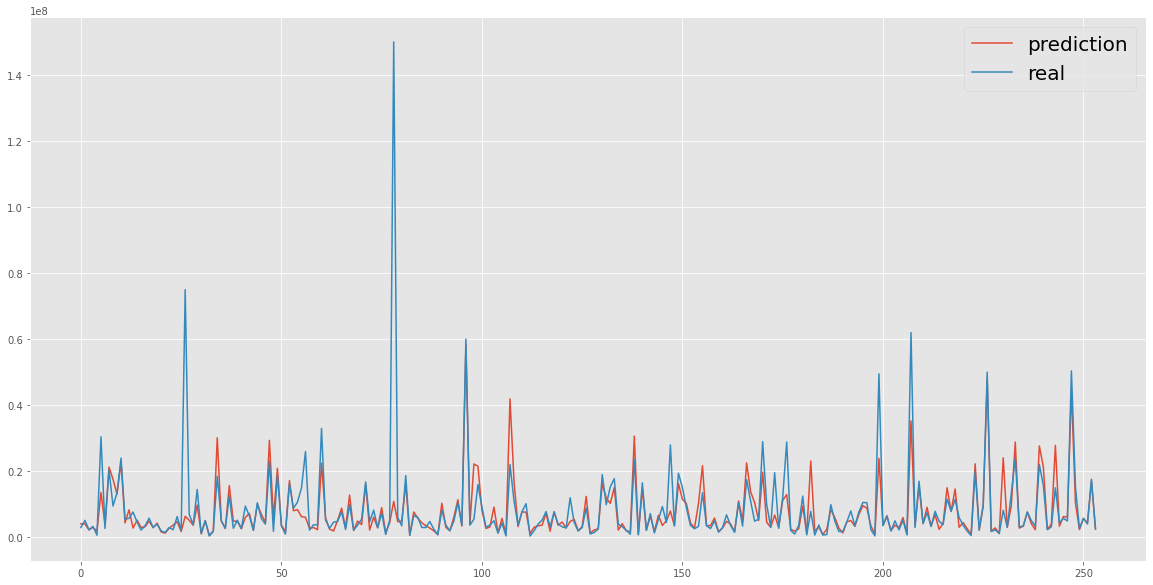

In [58]:
plt.style.use('ggplot')
plt.figure(figsize=(20, 10))

plt.plot(y_hat, label = 'prediction')
plt.plot(val_data_y, label = 'real')

plt.legend(fontsize = 20)
plt.show()

In [59]:
train_X = train.drop(['id', 'target'], axis = 1) #training 데이터에서 피쳐 추출
train_y = train.target #training 데이터에서 target 추출

In [60]:
#모델들을 할당할 리스트를 만들어줍니다.
models = []

#모델들을 각각 할당하여 리스트에 추가합니다.
models.append(ExtraTreesRegressor(n_estimators=400, max_depth=30, random_state=42))
models.append(RandomForestRegressor(n_estimators=400, max_depth=30, random_state=42))
models.append(GradientBoostingRegressor(loss='absolute_error', learning_rate=0.15, n_estimators=100, max_depth=5, max_features=6, random_state=42))

#모델들을 할당한 리스트를 불러와 순차적으로 train 데이터에 학습을 시켜줍니다.
for model in models:
    model.fit(train_data_X, train_data_y)

In [61]:
test=test.drop(['id'], axis = 1)

In [62]:
# 전처리가 완료된 테스트 데이터셋을 통해 본격적으로 학습한 모델로 추론을 시작합니다.
prediction = None

# 학습 된 모델들을 순차적으로 불러옵니다.
for model in models:
    # 각 모델들의 최종 회귀값들을 prediction에 모두 더해줍니다.
    if prediction is None:
        prediction = model.predict(test)
    else:
        prediction += model.predict(test)
        
# 앙상블에 참여한 모든 모델의 수 만큼 다시 나눠줍니다 (= 평균)
prediction /= len(models)
prediction

array([24114164.03853104,  4698728.4484866 ,  7413225.44378904,
        1266740.93891289,  2303692.99041334,  4791076.1640108 ,
        2367733.08363526,  6831243.07196902, 22924287.63081574,
        2693361.61514593, 41949274.79734667,  7684031.87568584,
        3306040.59534076,  3829012.62490237,  2042848.3462463 ,
        2814821.69367292,  2607039.53925004,  1380347.33880182,
        3163379.39110931,  2827940.91119497,  2806783.17439951,
        3800037.23783157,  2942067.89625795,  6469736.56786396,
        3889982.07241772,  4098113.7233321 ,  2007375.04908766,
        1308685.31359499,  1677050.84012725,  2249822.11054044,
         902006.56491604,  5059606.21165832,  2955072.46551948,
        1444276.77166528,  3317586.10259981,  6123176.77864718,
        4270629.6111565 ,  1125408.53084132,  4373108.80024118,
        7599463.00915338,  2297747.54877672,  4854178.07397638,
        2289782.7996371 ,  9686990.78028649,  7001546.26433197,
        8728893.78129101, 20174423.39337

In [63]:
y_pred = prediction

In [64]:
# 제출용 sample 파일을 불러옵니다.
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/user_data/sample_submission.csv')
submission.head()

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [65]:
# 위에서 구한 예측값을 그대로 넣어줍니다.
#submission['target'] = np.expm1(y_pred)
submission['target'] = y_pred
# 데이터가 잘 들어갔는지 확인합니다.
submission.head()

,id,target
0,0,2.411416e+07
1,1,4.698728e+06
2,2,7.413225e+06
3,3,1.266741e+06
4,4,2.303693e+06


In [66]:
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/user_data/submit1.csv', index=False)